In [1]:
# %matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [3]:
data = pd.read_csv('background-10min-650V.TKA', names=['background'])
data['Na-22'] = pd.read_csv('Na-22-10min-650V.TKA', header=None)
data['Cs-137'] = pd.read_csv('Cs-137-10min-650V.TKA', header=None)
data['background'] = pd.read_csv('background-10min-650V.TKA', header=None)
data['channel'] = np.arange(0, len(data))

In [4]:
calibration = []

In [5]:
data = data.iloc[2:940];
data.head()

,background,Na-22,Cs-137,channel
2,53,123,1463,2
3,42,142,1410,3
4,44,116,1699,4
5,61,127,1403,5
6,38,131,1017,6


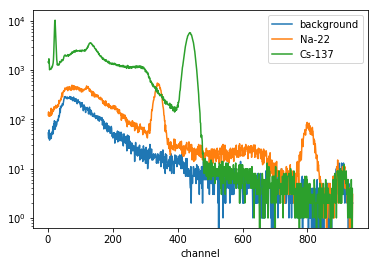

In [6]:
data.plot(x='channel', logy=True)

In [7]:
peak = models.GaussianModel()
guess = peak.make_params(center=344, amplitude=500 / .4)
peak1 = peak.fit(data['Na-22'], x=data['channel'], params=guess)
guess = peak.make_params(center=800, amplitude=82 / .4)
peak2 = peak.fit(data['Na-22'], x=data['channel'], params=guess)

In [8]:
calibration.append({'channel': peak1.params['center'].value, 'energy': 511.0})
calibration.append({'channel': peak2.params['center'].value, 'energy': 1274.537})

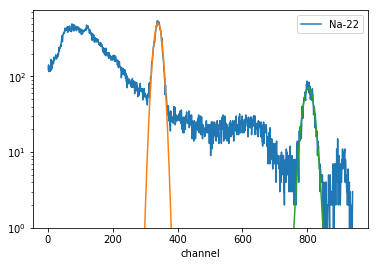

In [9]:
ax = data.plot('channel', 'Na-22', logy=True, ylim=(1, None))
ax.plot(data['channel'], peak1.best_fit)
ax.plot(data['channel'], peak2.best_fit)

In [10]:
guess = peak.make_params(center=439, amplitude=5800 / .4)
peak1 = peak.fit(data['Cs-137'], x=data['channel'], params=guess)
guess = peak.make_params(center=24, amplitude=10400 / .4)
peak2 = peak.fit(data['Cs-137'], x=data['channel'], params=guess)

In [11]:
calibration.append({'channel': peak1.params['center'].value, 'energy': 661.657})
calibration.append({'channel': peak2.params['center'].value, 'energy': 32.194})

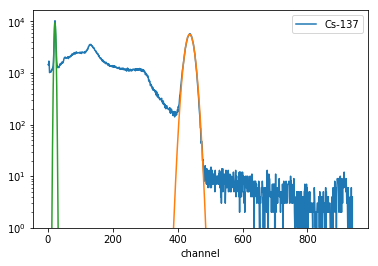

In [12]:
ax = data.plot('channel', 'Cs-137', logy=True, ylim=(1, None))
ax.plot(data['channel'], peak1.best_fit)
ax.plot(data['channel'], peak2.best_fit)

In [13]:
calibration = pd.DataFrame.from_dict(calibration).sort_values('energy')
calibration

,channel,energy
3,22.627286,32.194
0,339.803773,511.000
2,437.283045,661.657
1,802.930609,1274.537


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 819.064273
    reduced chi-square = 409.532137
    Akaike info crit   = 25.2874728
    Bayesian info crit = 24.0600615
[[Variables]]
    intercept: -18.6624655 +/- 17.7371874 (95.04%) (init = 0)
    slope:      1.59363949 +/- 0.03635973 (2.28%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(intercept, slope) = -0.821



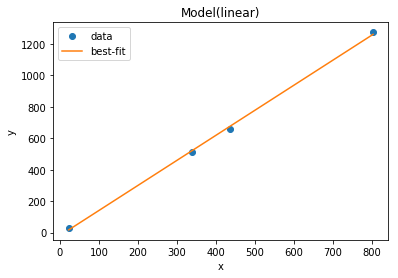

In [14]:
plt.figure()
linear = models.LinearModel()
result = linear.fit(calibration['energy'], x=calibration['channel'])
result.plot_fit()
print(result.fit_report())

In [15]:
# plt.close('all')